In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, mean_squared_error

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
data = pd.read_csv(r"/Users/arunabhapani/Desktop/Wine_quality_model/WineQT.csv")

In [11]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [15]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [16]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [17]:
data.dtypes[data.dtypes != 'object']

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

<Axes: xlabel='fixed acidity', ylabel='quality'>

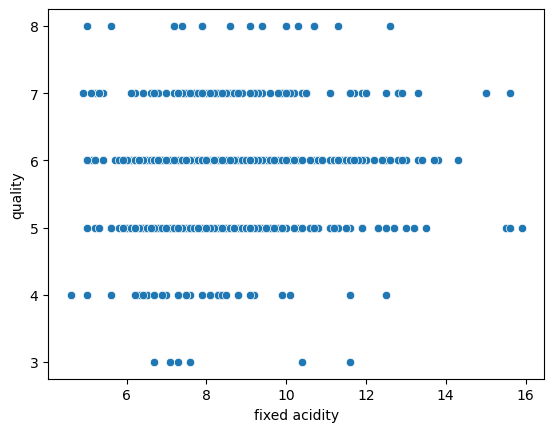

In [18]:
sns.scatterplot(x = 'fixed acidity', y = 'quality', data = data)

In [19]:
data[(data['fixed acidity'] > 12) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
310,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8,440


In [20]:
data[(data['fixed acidity'] < 6) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8,390
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.9917,3.72,0.74,14.0,8,588


In [21]:
data[(data['fixed acidity'] > 14.5) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
170,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,243
171,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,244
311,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,442


In [22]:
data[(data['fixed acidity'] > 14.5) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
397,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,554
399,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,557
462,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,652


In [23]:
data[(data['fixed acidity'] > 11) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
284,12.5,0.46,0.49,4.5,0.070,26.0,49.0,0.99810,3.05,0.57,9.6,4,409
596,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,833


In [24]:
data[(data['fixed acidity'] > 10) & (data['quality'] == 3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
324,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3,459
368,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3,517


<Axes: xlabel='volatile acidity', ylabel='quality'>

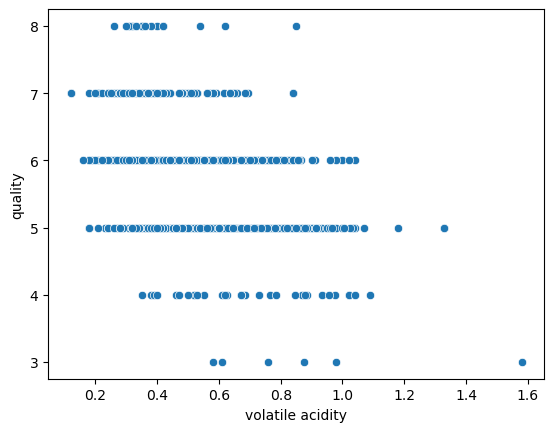

In [25]:
sns.scatterplot(x = 'volatile acidity', y = 'quality', data = data)

In [26]:
data[(data['volatile acidity'] > 0.5) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,390
321,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,455
793,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8,1120


In [27]:
data[(data['volatile acidity'] > 0.8) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
294,6.6,0.84,0.03,2.3,0.059,32.0,48.0,0.9952,3.52,0.56,12.3,7,421
297,6.6,0.84,0.03,2.3,0.059,32.0,48.0,0.9952,3.52,0.56,12.3,7,425


In [28]:
data[(data['volatile acidity'] > 1.1) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
87,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5,126
88,8.1,1.33,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5,127
931,8.0,1.18,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5,1312


In [29]:
data[(data['volatile acidity'] > 1.4) & (data['quality'] == 3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
922,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3,1299


<Axes: xlabel='citric acid', ylabel='quality'>

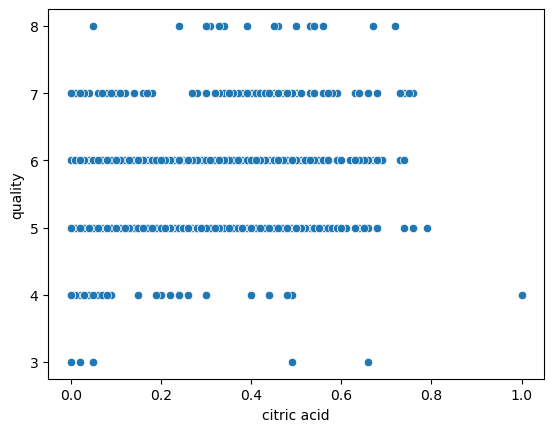

In [30]:
sns.scatterplot(x = 'citric acid', y = 'quality', data = data)

In [31]:
data[(data['citric acid'] < 0.2) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8,390


In [32]:
data[(data['citric acid'] > 0.8) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
103,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4,151


In [33]:
data[(data['citric acid'] > 0.4) & (data['quality'] == 3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
324,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3,459
368,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3,517


In [34]:
data[(data['citric acid'] > 0.7) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
182,7.7,0.41,0.76,1.80,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5,258
248,13.5,0.53,0.79,4.80,0.120,23.0,77.0,1.0018,3.18,0.77,13.0,5,353
383,11.2,0.50,0.74,5.15,0.100,5.0,17.0,0.9996,3.22,0.62,11.2,5,539


In [35]:
data[(data['citric acid'] > 0.7) & (data['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
308,11.1,0.45,0.73,3.2,0.066,6.0,22.0,0.9986,3.17,0.66,11.2,6,437
388,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.0008,2.86,0.79,8.4,6,544


<Axes: xlabel='residual sugar', ylabel='quality'>

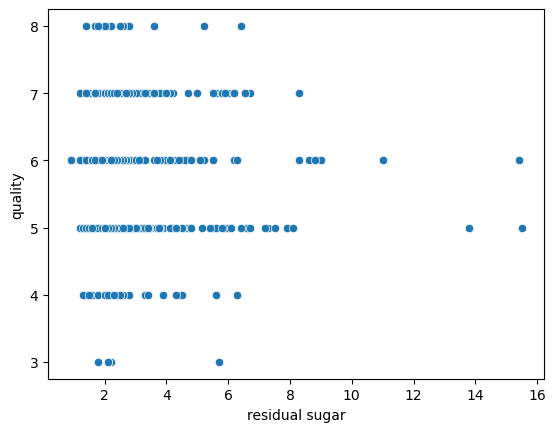

In [36]:
sns.scatterplot(x = 'residual sugar', y = 'quality', data = data)

In [37]:
data[(data['residual sugar'] > 3) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
190,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8,267
197,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8,278
321,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8,455


In [38]:
data[(data['residual sugar'] > 4) & (data['quality'] == 3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.4,0.52,10.2,3,1478


In [39]:
data[(data['residual sugar'] > 5) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
832,6.5,0.88,0.03,5.6,0.079,23.0,47.0,0.99572,3.58,0.50,11.2,4,1176
904,8.5,0.40,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,4,1276


In [40]:
data[(data['residual sugar'] > 12) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
339,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5,480
1051,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5,1474
1053,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5,1476


In [41]:
data[(data['residual sugar'] > 8) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
760,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7,1079
761,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7,1081


In [42]:
data[(data['residual sugar'] > 10) & (data['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
230,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6,324
231,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6,325
1022,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6,1434


<Axes: xlabel='chlorides', ylabel='quality'>

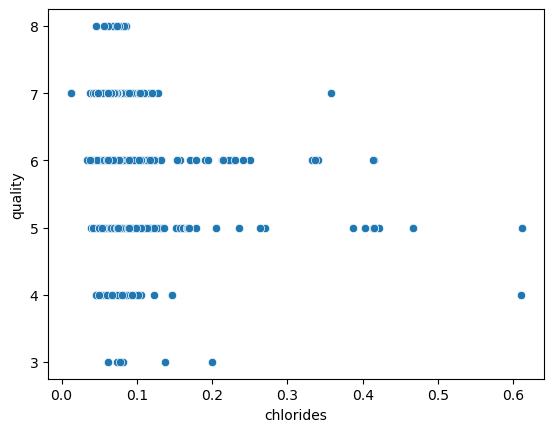

In [43]:
sns.scatterplot(x = 'chlorides', y = 'quality', data = data)

In [44]:
data[(data['chlorides'] > 0.1) & (data['quality'] == 3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
368,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,517
922,7.6,1.58,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,1299


In [45]:
data[(data['chlorides'] > 0.13) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
103,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,151
596,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,833


In [46]:
data[(data['chlorides'] > 0.45) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
75,7.8,0.41,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5,106
182,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5,258


In [47]:
data[(data['chlorides'] > 0.3) & (data['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
13,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,19
30,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6,42
161,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,226
538,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6,754
934,9.1,0.76,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6,1319


In [48]:
data[(data['chlorides'] > 0.3) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
200,7.7,0.27,0.68,3.5,0.358,5.0,10.0,0.9972,3.25,1.08,9.9,7,281


<Axes: xlabel='free sulfur dioxide', ylabel='quality'>

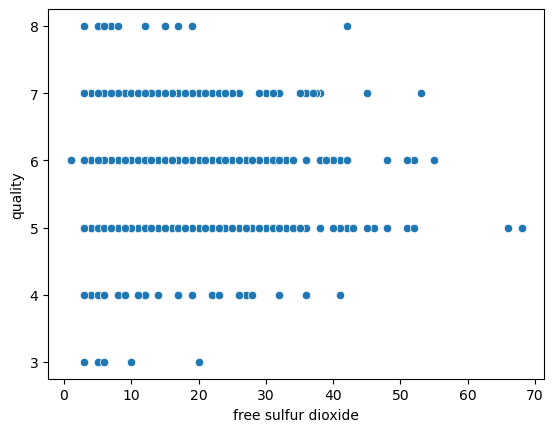

In [49]:
sns.scatterplot(x = 'free sulfur dioxide', y = 'quality', data = data)

In [50]:
data[(data['free sulfur dioxide'] > 15) & (data['quality'] == 3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1046,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3,1469


In [51]:
data[(data['free sulfur dioxide'] > 30) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
66,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4,94
103,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,151
596,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,833


In [52]:
data[(data['free sulfur dioxide'] > 60) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
275,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5,396
278,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5,400
1111,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5,1558


In [53]:
data[(data['free sulfur dioxide'] > 45) & (data['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
655,9.4,0.24,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6,926
690,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,6,982
831,6.5,0.61,0.00,2.2,0.095,48.0,59.0,0.99541,3.61,0.70,11.5,6,1175
1022,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6,1434


In [54]:
data[(data['free sulfur dioxide'] > 40) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
654,8.6,0.22,0.36,1.90,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7,925
820,8.5,0.18,0.51,1.75,0.071,45.0,88.0,0.99524,3.33,0.76,11.8,7,1156


In [55]:
data[(data['free sulfur dioxide'] > 30) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
769,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,1090


<Axes: xlabel='total sulfur dioxide', ylabel='quality'>

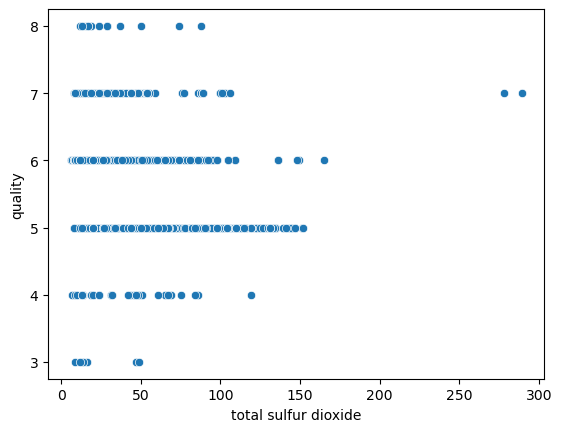

In [56]:
sns.scatterplot(x = 'total sulfur dioxide', y = 'quality', data = data)

In [57]:
data[(data['total sulfur dioxide'] > 40) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,390
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,588
769,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,1090


In [58]:
data[(data['total sulfur dioxide'] > 250) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
760,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7,1079
761,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7,1081


In [59]:
data[(data['total sulfur dioxide'] > 130) & (data['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
59,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.9972,2.93,1.95,9.9,6,86
64,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.9972,2.93,1.95,9.9,6,91
249,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.9912,3.25,0.59,11.9,6,354
421,6.6,0.39,0.49,1.7,0.070,23.0,149.0,0.9922,3.12,0.50,11.5,6,591
460,6.7,0.42,0.27,8.6,0.068,24.0,148.0,0.9948,3.16,0.57,11.3,6,649


In [60]:
data[(data['total sulfur dioxide'] > 100) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
54,8.3,0.625,0.2,1.5,0.08,27.0,119.0,0.9972,3.16,1.12,9.1,4,79


In [61]:
data[(data['total sulfur dioxide'] > 40) & (data['quality'] == 3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
324,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,459
1046,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3,1469


<Axes: xlabel='density', ylabel='quality'>

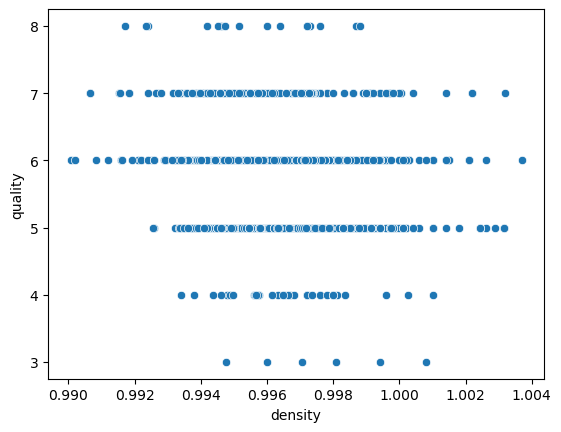

In [62]:
sns.scatterplot(x = 'density', y = 'quality', data = data)

In [63]:
data[(data['density'] < 0.994) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,390
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,588
793,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8,1120


In [64]:
data[(data['density'] < 0.991) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
597,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,836
598,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,837


In [65]:
data[(data['density'] > 1.002) & (data['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
400,13.0,0.47,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6,559
404,13.0,0.47,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6,564
430,10.1,0.65,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6,608
1022,10.2,0.54,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6,1434


In [66]:
data[(data['density'] < 0.993) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
739,5.6,0.605,0.05,2.4,0.073,19.0,25.0,0.99258,3.56,0.55,12.9,5,1052
792,5.6,0.660,0.00,2.5,0.066,7.0,15.0,0.99256,3.52,0.58,12.9,5,1119


In [67]:
data[(data['density'] > 0.999) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
103,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,151
189,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4,266
449,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.3,4,633


In [68]:
data[(data['density'] > 1.001) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
259,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.0022,3.07,0.73,10.0,7,364
260,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.0022,3.07,0.73,10.0,7,366
311,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.0032,2.95,0.68,11.2,7,442
382,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.0014,3.20,0.66,12.0,7,538


<Axes: xlabel='pH', ylabel='quality'>

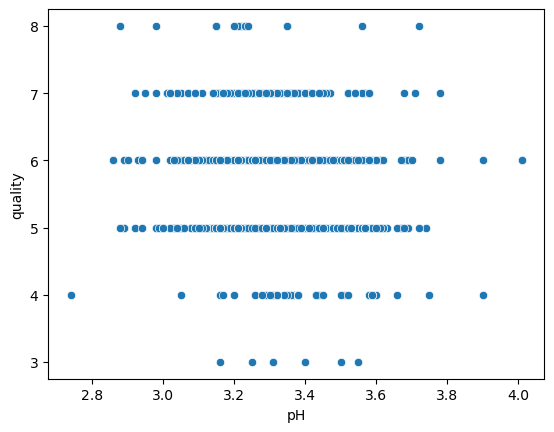

In [69]:
sns.scatterplot(x = 'pH', y = 'quality', data = data)

In [70]:
data[(data['pH'] > 3.5) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8,390
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.9917,3.72,0.74,14.0,8,588


In [71]:
data[(data['pH'] < 3.1) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
310,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,440
769,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,1090


In [72]:
data[(data['pH'] > 3.65) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
589,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,821
785,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7,1111
868,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,1228


In [73]:
data[(data['pH'] > 3.80) & (data['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
493,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6,695
933,5.4,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,1316
935,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,1321


In [74]:
data[(data['pH'] < 3.1) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
103,9.2,0.52,1.00,3.4,0.61,32.0,69.0,0.9996,2.74,2.00,9.4,4,151
284,12.5,0.46,0.49,4.5,0.07,26.0,49.0,0.9981,3.05,0.57,9.6,4,409


In [75]:
data[(data['pH'] > 3.7) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
32,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4,45
66,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,4,94


<Axes: xlabel='sulphates', ylabel='quality'>

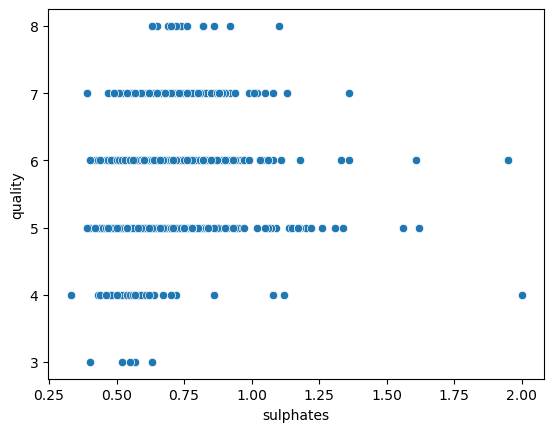

In [76]:
sns.scatterplot(x = 'sulphates', y = 'quality', data = data)

In [77]:
data[(data['sulphates'] > 1) & (data['quality'] == 8)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
996,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.996,3.23,1.1,10.0,8,1403


In [78]:
data[(data['sulphates'] > 1.25) & (data['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
240,12.5,0.28,0.54,2.3,0.082,12.0,29.0,0.9997,3.11,1.36,9.8,7,339


In [79]:
data[(data['sulphates'] > 1.25) & (data['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
59,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6,86
64,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6,91
161,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,226
454,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3,6,639
934,9.1,0.76,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6,1319


In [80]:
data[(data['sulphates'] > 1.50) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
11,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,13
514,7.1,0.31,0.30,2.2,0.053,36.0,127.0,0.9965,2.94,1.62,9.5,5,723


In [81]:
data[(data['sulphates'] > 1.00) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
54,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4,79
103,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4,151
112,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.9965,3.17,1.08,9.2,4,161


In [82]:
data[(data['sulphates'] < 0.50) & (data['quality'] == 3)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
922,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3,1299


<Axes: xlabel='alcohol', ylabel='quality'>

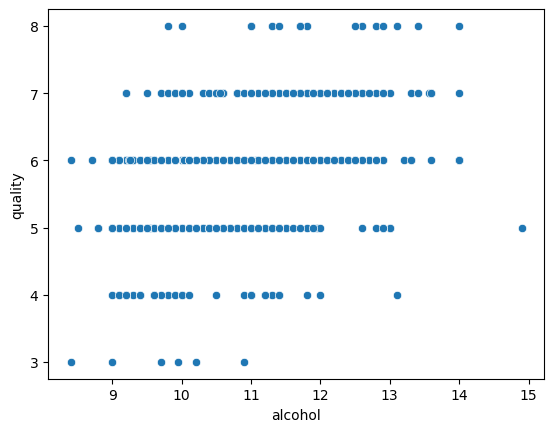

In [83]:
sns.scatterplot(x = 'alcohol', y = 'quality', data = data)

In [84]:
data[(data['alcohol'] > 14) & (data['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
462,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,652


In [85]:
data[(data['alcohol'] >13) & (data['quality'] == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
32,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,4,45


In [86]:
dropped_vals  = list(set([13, 19, 42, 45, 56, 79, 81, 86, 91, 94, 106, 126, 127, 151, 161, 226, 243, 244, 258, 266, 267, 278, 281,
                   324, 325, 339, 353, 354, 364, 366, 390, 396, 400, 409, 421, 425, 437, 440, 442, 455, 459, 480,
                    517, 544, 538, 539, 554, 557, 559, 564, 588, 591, 608, 633, 639, 649, 652, 695, 723, 754, 821, 833,
                   836, 837, 926, 982, 1052, 1079, 1081, 1090, 1111, 1119, 1120,1156,1175, 1176, 1228, 1276,
                    1299, 1312, 1316, 1319, 1321, 1434, 1469, 1474, 1276, 1478, 1558, 1403]))

In [87]:
data = data[data.Id.isin(dropped_vals) == False]

In [88]:
null_vals = pd.DataFrame(data.isnull().sum().sort_values(ascending = False))
null_vals

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<Axes: xlabel='quality', ylabel='count'>

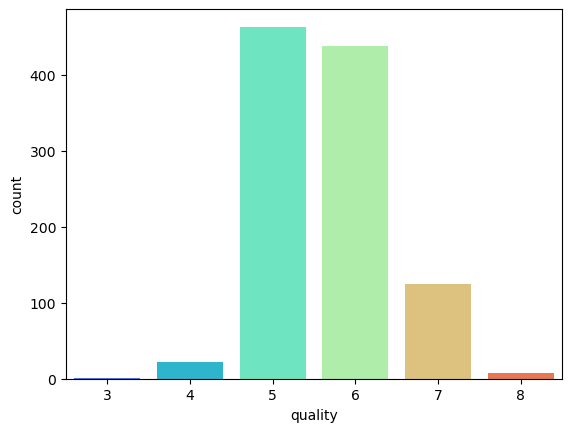

In [89]:
sns.countplot(x = data['quality'], palette = 'rainbow')

In [90]:
correlation = data.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.267502,0.681487,0.115535,0.140905,-0.151866,-0.096792,0.651428,-0.697632,0.183662,-0.058071,0.142783,-0.277916
volatile acidity,-0.267502,1.000000,-0.562214,0.023389,0.092208,0.015580,0.134461,0.018066,0.187801,-0.307766,-0.245712,-0.397018,-0.016237
citric acid,0.681487,-0.562214,1.000000,0.163501,0.175011,-0.060992,0.013420,0.364053,-0.506850,0.326628,0.141538,0.250567,-0.120753
residual sugar,0.115535,0.023389,0.163501,1.000000,0.067733,0.116733,0.155625,0.336641,-0.053600,0.054799,0.086236,0.033256,-0.061334
chlorides,0.140905,0.092208,0.175011,0.067733,1.000000,-0.024630,0.067237,0.226937,-0.242466,0.235632,-0.222999,-0.127476,-0.057430
free sulfur dioxide,-0.151866,0.015580,-0.060992,0.116733,-0.024630,1.000000,0.667146,-0.034972,0.081955,0.019998,-0.070610,-0.082331,0.091421
total sulfur dioxide,-0.096792,0.134461,0.013420,0.155625,0.067237,0.667146,1.000000,0.124934,-0.029066,-0.020341,-0.268557,-0.260162,-0.121877
density,0.651428,0.018066,0.364053,0.336641,0.226937,-0.034972,0.124934,1.000000,-0.311401,0.127936,-0.515284,-0.173999,-0.389176
pH,-0.697632,0.187801,-0.506850,-0.053600,-0.242466,0.081955,-0.029066,-0.311401,1.000000,-0.066192,0.179919,-0.045374,0.113470
sulphates,0.183662,-0.307766,0.326628,0.054799,0.235632,0.019998,-0.020341,0.127936,-0.066192,1.000000,0.204346,0.337074,-0.037971


<Axes: >

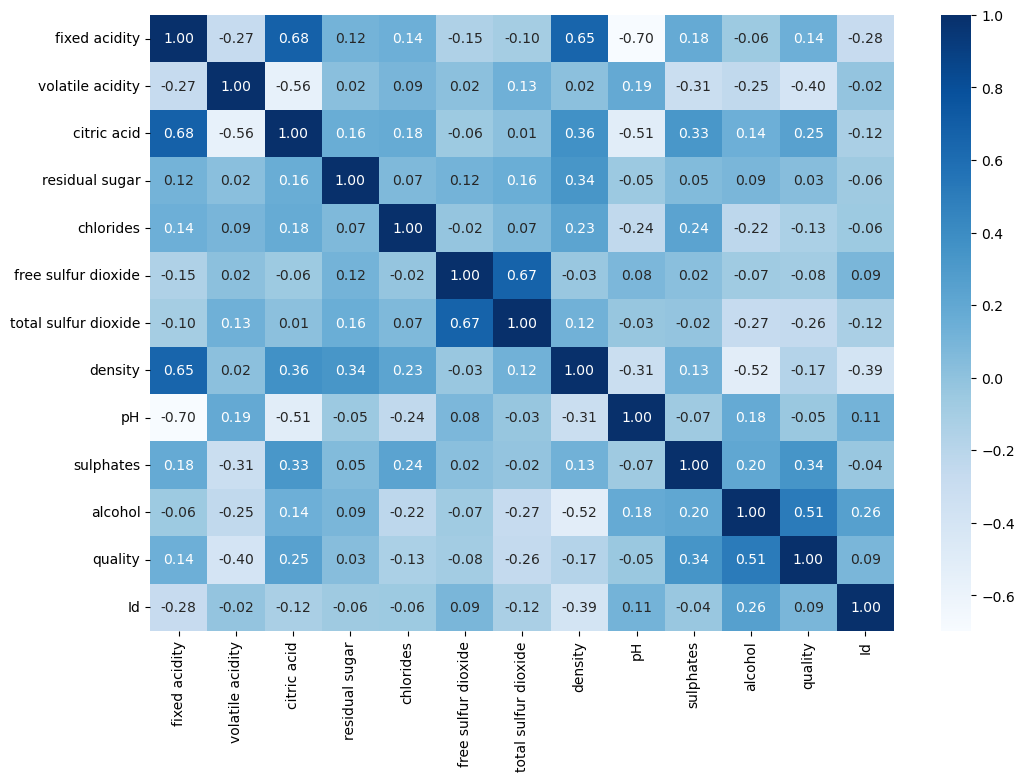

In [91]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True,  cmap = 'Blues', fmt = '.2f')

In [92]:
test_data = pd.DataFrame(data['Id'])

In [93]:
X = data.drop(['quality'], axis = 1)
y = data['quality'].apply(lambda x : 1 if x >= 7 else 0)

In [94]:
test_data['quality'] = y

In [95]:
test_data

,Id,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1138,1592,0
1139,1593,0
1140,1594,0
1141,1595,0


In [96]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
lr_model = LogisticRegression()

In [98]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [99]:
y_pred_lr = lr_model.predict(X_test)

In [100]:
r2_0 = r2_score(y_test, y_pred_lr)
print('r2_score_lr: ',r2_0)

r2_score_lr:  -0.07669680011479407


In [101]:
acs_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy_score_lr:', acs_lr)

Accuracy_score_lr: 0.8767908309455588


In [102]:
n = len(y_test)
p = 2
corrected_r2_0 = 1 - (1 - r2_0) * (n - 1) / (n - p - 1)
print('corrected_r2_score_lr: ',corrected_r2_0)

corrected_r2_score_lr:  -0.08292048104031324


In [103]:
msr_lr = mean_squared_error(y_test, y_pred_lr)
print('Mean_Squared_Error_lr: ', msr_lr)

Mean_Squared_Error_lr:  0.12320916905444126


In [104]:
dtc_model = DecisionTreeClassifier(random_state = 42)

In [105]:
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [106]:
y_pred_dtc = dtc_model.predict(X_test)

In [107]:
r2_1 = r2_score(y_test, y_pred_dtc)
print('r2_score_dtc: ',r2_1)

r2_score_dtc:  -0.1768546419859378


In [108]:
corrected_r2_1 = 1 - (1 - r2_1) * (n - 1) / (n - p - 1)
print('corrected_r2_score_dtc: ',corrected_r2_1)

corrected_r2_score_dtc:  -0.183657269974296


In [109]:
acs_dtc = accuracy_score(y_test, y_pred_dtc)
print('Accuracy_score_dtc: ', acs_dtc)

Accuracy_score_dtc:  0.8653295128939829


In [120]:
msr_dtc = mean_squared_error(y_test, y_pred_dtc)
print('Mean_Squared_Error_dtc: ', msr_dtc)

Mean_Squared_Error_dtc:  0.1346704871060172


In [110]:
rfc_model = RandomForestClassifier()

In [111]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
y_pred_rfc = rfc_model.predict(X_test)

In [113]:
r2_2 = r2_score(y_test, y_pred_rfc)
print('r2_score_rfc:', r2_2)

r2_score_rfc: 0.24881618596642274


In [114]:
corrected_r2_2 = 1 - (1 - r2_2) * (n - 1) / (n - p - 1)
print("corrected_r2_score_rfc: ", corrected_r2_2)

corrected_r2_score_rfc:  0.2444740829951304


In [115]:
acs_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy_score_rfc: ', acs_rfc)

Accuracy_score_rfc:  0.9140401146131805


In [122]:
msr_rfc = mean_squared_error(y_test, y_pred_rfc)
print('Mean_Squared_Error_lr: ', msr_rfc)

Mean_Squared_Error_lr:  0.08595988538681948
